In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [4]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [6]:
df=pd.read_csv("BankChurners.csv")
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [7]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [12]:
df=df.iloc[:,:-9]

In [14]:
df.drop(["CLIENTNUM","Attrition_Flag"],axis=1,inplace=True)

In [15]:
df

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit
0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0
3,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0
10123,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0
10124,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0
10125,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0


In [17]:
from sklearn.preprocessing import LabelEncoder

In [21]:
df["Gender"]=LabelEncoder().fit_transform(df.Gender)

In [22]:
df

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit
0,45,1,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0
1,49,0,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0
2,51,1,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0
3,40,0,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0
4,40,1,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,1,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0
10123,41,1,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0
10124,44,0,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0
10125,30,1,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0


<AxesSubplot:xlabel='Credit_Limit'>

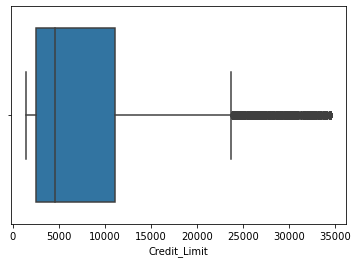

In [24]:
sns.boxplot(x="Credit_Limit",data=df)

In [26]:
climit=df.Credit_Limit
q1=climit.quantile(0.25)
q3=climit.quantile(0.75)
iqr=q3-q1
down_limit=q1-(iqr*1.5)
up_limit=q3+(iqr*1.5)
down_limit,up_limit

(-10213.75, 23836.25)

In [30]:
df=df[df.Credit_Limit <= up_limit]

In [37]:
y=df.Credit_Limit
x=df.drop(["Credit_Limit"],axis=1)

In [39]:
x

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon
0,45,1,3,High School,Married,$60K - $80K,Blue,39,5,1,3
1,49,0,5,Graduate,Single,Less than $40K,Blue,44,6,1,2
2,51,1,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0
3,40,0,4,High School,Unknown,Less than $40K,Blue,34,3,4,1
4,40,1,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...
10122,50,1,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3
10123,41,1,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3
10124,44,0,1,High School,Married,Less than $40K,Blue,36,5,3,4
10125,30,1,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3


In [42]:
df_dummies=pd.get_dummies(df,columns=["Education_Level","Marital_Status","Income_Category","Card_Category"])

In [45]:
df=df_dummies

In [46]:
from sklearn.neighbors import LocalOutlierFactor
lof=LocalOutlierFactor()
lof.fit_predict(df)
lof_scores=lof.negative_outlier_factor_
lof_scores

array([-1.04691757, -1.00079857, -0.96081507, ..., -1.04212404,
       -1.08095799, -1.09424088])

In [49]:
vector= lof_scores >= -2

In [51]:
df=df[vector]

In [53]:
y=df.Credit_Limit
x=df.drop(["Credit_Limit"],axis=1)

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

7377    2053.0
4451    1457.0
1829    2507.0
997     2155.0
7251    2467.0
         ...  
9777    6261.0
2819    2222.0
674     6361.0
263     2474.0
3581    2936.0
Name: Credit_Limit, Length: 1828, dtype: float64

In [57]:
models = [LGBMRegressor, 
          XGBRegressor, 
          GradientBoostingRegressor, 
          RandomForestRegressor, 
          DecisionTreeRegressor,
          MLPRegressor,
          KNeighborsRegressor, 
          SVR]

def otoml(x_train,y_train,x_test,y_test,alg):
    model=alg().fit(x_train,y_train)
    rmse=np.sqrt(mean_squared_error(y_test,model.predict(x_test)))
    print(alg.__name__,"algoritmasının RMSE test değeri:",rmse)

for alg in models:
    otoml(x_train,y_train,x_test,y_test,alg)

LGBMRegressor algoritmasının RMSE test değeri: 4306.6101614245645
XGBRegressor algoritmasının RMSE test değeri: 4516.446249863051
GradientBoostingRegressor algoritmasının RMSE test değeri: 4207.778473683712
RandomForestRegressor algoritmasının RMSE test değeri: 4423.445489125548
DecisionTreeRegressor algoritmasının RMSE test değeri: 6241.394846467665


C:\Users\berka\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor algoritmasının RMSE test değeri: 4577.2509453788925
KNeighborsRegressor algoritmasının RMSE test değeri: 4979.939964066864
SVR algoritmasının RMSE test değeri: 5503.764811567632


In [59]:
?LGBMRegressor

In [61]:
lgbm_params={
    "learning_rate":[0.01,0.1,0.2],
    "num_leaves":[25,31,40],
    "n_estimators":[50,100,500,2000],
    "min_child_samples":[10,20,30]
}

lgbm_cv_model=GridSearchCV(LGBMRegressor(),lgbm_params,cv=5,verbose=2,n_jobs=-1).fit(x_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   54.3s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  1.5min finished


In [62]:
lgbm_cv_model.best_params_

{'learning_rate': 0.01,
 'min_child_samples': 10,
 'n_estimators': 500,
 'num_leaves': 25}

In [63]:
lgbm_tuned=LGBMRegressor(learning_rate=0.01,
                        min_child_samples=10,
                        n_estimators=500,
                        num_leaves=25)
lgbm_tuned.fit(x_train,y_train,eval_metric="rmse",eval_set=[(x_test,y_test)],early_stopping_rounds=2000)

[1]	valid_0's rmse: 5090.44	valid_0's l2: 2.59126e+07
Training until validation scores don't improve for 2000 rounds
[2]	valid_0's rmse: 5073.32	valid_0's l2: 2.57386e+07
[3]	valid_0's rmse: 5056.46	valid_0's l2: 2.55678e+07
[4]	valid_0's rmse: 5039.9	valid_0's l2: 2.54006e+07
[5]	valid_0's rmse: 5023.63	valid_0's l2: 2.52368e+07
[6]	valid_0's rmse: 5007.82	valid_0's l2: 2.50782e+07
[7]	valid_0's rmse: 4992.15	valid_0's l2: 2.49215e+07
[8]	valid_0's rmse: 4976.85	valid_0's l2: 2.47691e+07
[9]	valid_0's rmse: 4961.82	valid_0's l2: 2.46196e+07
[10]	valid_0's rmse: 4947.18	valid_0's l2: 2.44746e+07
[11]	valid_0's rmse: 4932.61	valid_0's l2: 2.43306e+07
[12]	valid_0's rmse: 4918.45	valid_0's l2: 2.41912e+07
[13]	valid_0's rmse: 4904.48	valid_0's l2: 2.40539e+07
[14]	valid_0's rmse: 4890.76	valid_0's l2: 2.39196e+07
[15]	valid_0's rmse: 4877.36	valid_0's l2: 2.37887e+07
[16]	valid_0's rmse: 4864.17	valid_0's l2: 2.36601e+07
[17]	valid_0's rmse: 4851.16	valid_0's l2: 2.35338e+07
[18]	valid_0

[283]	valid_0's rmse: 4216.46	valid_0's l2: 1.77785e+07
[284]	valid_0's rmse: 4216.35	valid_0's l2: 1.77776e+07
[285]	valid_0's rmse: 4216.77	valid_0's l2: 1.77811e+07
[286]	valid_0's rmse: 4216.75	valid_0's l2: 1.7781e+07
[287]	valid_0's rmse: 4216.64	valid_0's l2: 1.77801e+07
[288]	valid_0's rmse: 4216.68	valid_0's l2: 1.77804e+07
[289]	valid_0's rmse: 4216.65	valid_0's l2: 1.77802e+07
[290]	valid_0's rmse: 4216.56	valid_0's l2: 1.77793e+07
[291]	valid_0's rmse: 4216.57	valid_0's l2: 1.77795e+07
[292]	valid_0's rmse: 4216.97	valid_0's l2: 1.77828e+07
[293]	valid_0's rmse: 4216.95	valid_0's l2: 1.77827e+07
[294]	valid_0's rmse: 4216.97	valid_0's l2: 1.77829e+07
[295]	valid_0's rmse: 4217.05	valid_0's l2: 1.77836e+07
[296]	valid_0's rmse: 4217.06	valid_0's l2: 1.77836e+07
[297]	valid_0's rmse: 4217.4	valid_0's l2: 1.77865e+07
[298]	valid_0's rmse: 4217.32	valid_0's l2: 1.77858e+07
[299]	valid_0's rmse: 4217.43	valid_0's l2: 1.77868e+07
[300]	valid_0's rmse: 4217.67	valid_0's l2: 1.7788

[446]	valid_0's rmse: 4228.71	valid_0's l2: 1.7882e+07
[447]	valid_0's rmse: 4228.91	valid_0's l2: 1.78837e+07
[448]	valid_0's rmse: 4229.29	valid_0's l2: 1.78869e+07
[449]	valid_0's rmse: 4229.17	valid_0's l2: 1.78859e+07
[450]	valid_0's rmse: 4228.91	valid_0's l2: 1.78837e+07
[451]	valid_0's rmse: 4229.2	valid_0's l2: 1.78861e+07
[452]	valid_0's rmse: 4229.26	valid_0's l2: 1.78866e+07
[453]	valid_0's rmse: 4229.14	valid_0's l2: 1.78856e+07
[454]	valid_0's rmse: 4229.25	valid_0's l2: 1.78865e+07
[455]	valid_0's rmse: 4229.31	valid_0's l2: 1.78871e+07
[456]	valid_0's rmse: 4228.97	valid_0's l2: 1.78842e+07
[457]	valid_0's rmse: 4229.2	valid_0's l2: 1.78861e+07
[458]	valid_0's rmse: 4229.4	valid_0's l2: 1.78878e+07
[459]	valid_0's rmse: 4229.28	valid_0's l2: 1.78868e+07
[460]	valid_0's rmse: 4229.52	valid_0's l2: 1.78888e+07
[461]	valid_0's rmse: 4229.64	valid_0's l2: 1.78899e+07
[462]	valid_0's rmse: 4229.51	valid_0's l2: 1.78887e+07
[463]	valid_0's rmse: 4229.25	valid_0's l2: 1.78865e

LGBMRegressor(learning_rate=0.01, min_child_samples=10, n_estimators=500,
              num_leaves=25)

In [75]:
lgbm_tuned=LGBMRegressor(learning_rate=0.01,
                        min_child_samples=10,
                        n_estimators=284,
                        num_leaves=25).fit(x_train,y_train)


In [76]:
y_pred=lgbm_tuned.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

4216.3483223627845

In [66]:
lgbm_tuned.score(x_train,y_train),lgbm_tuned.score(x_test,y_test)

(0.41239904529838667, 0.31756222515875154)

In [71]:
np.sqrt(mean_squared_error(y_test,y_pred)),np.sqrt(mean_squared_error(y_train,lgbm_tuned.predict(x_train)))

(5107.298608337825, 5259.125564861703)

In [70]:
lgbm_tuned=LGBMRegressor(learning_rate=0.01,
                        min_child_samples=10,
                        n_estimators=284,
                        num_leaves=25,
                        reg_lambda=1.77776e+07).fit(x_train,y_train)
y_pred=lgbm_tuned.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

5107.298608337825

In [77]:
lgbm_tuned=LGBMRegressor(learning_rate=0.01,
                        min_child_samples=10,
                        n_estimators=284,
                        num_leaves=25).fit(x_train,y_train)

print("Train setinde rmse hatası:",np.sqrt(mean_squared_error(y_train,lgbm_tuned.predict(x_train))))
print("Test setinde rmse hatası:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("-"*30)
print("Train setinde r2_score:",r2_score(y_train,lgbm_tuned.predict(x_train)))
print("Test setinde r2_score",r2_score(y_test,y_pred))

Train setinde rmse hatası: 4031.8286783644567
Test setinde rmse hatası: 4216.3483223627845
------------------------------
Train setinde r2_score: 0.41239904529838667
Test setinde r2_score 0.31756222515875154


In [78]:
#Orta şekerli , veri azdı.